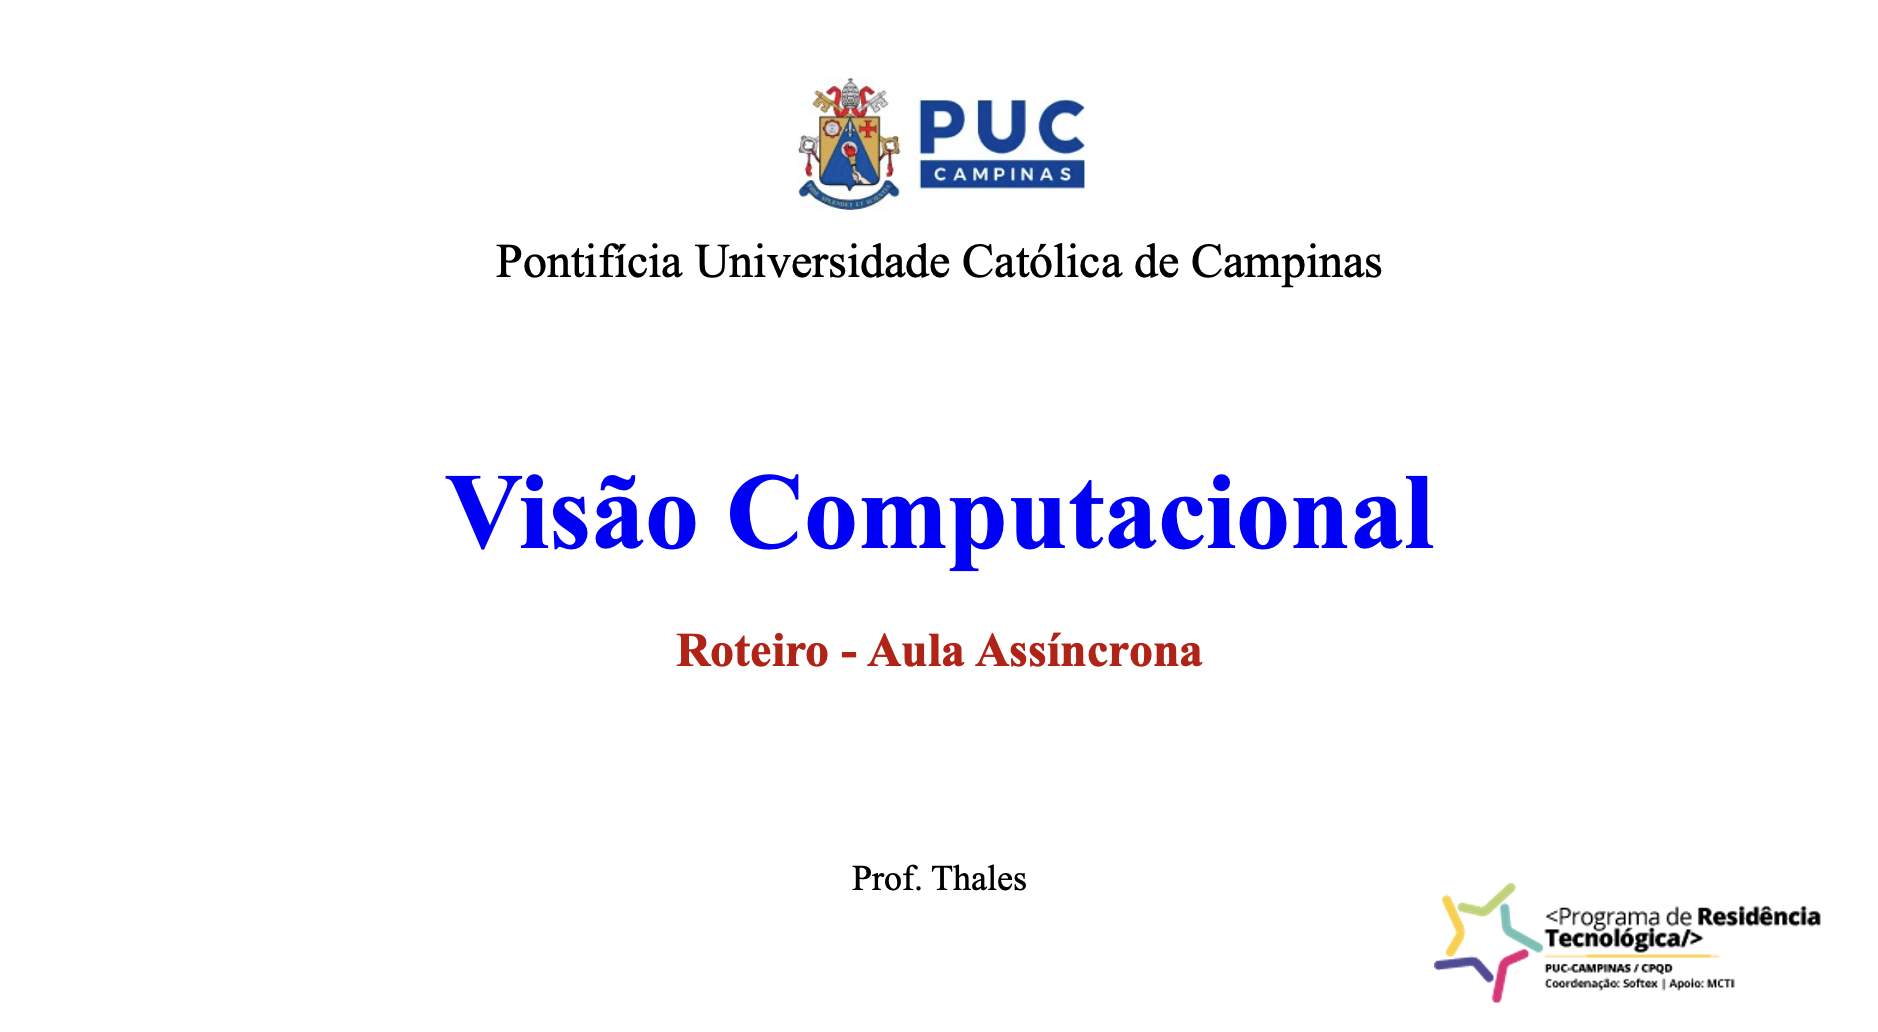



---



---



# **Tópico I: OCR**

In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (8,079 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [2]:
!pip install pytesseract

A) Carregue a imagem presente na url "https://cdn.pixabay.com/photo/2020/02/07/14/22/dream-4827288_1280.jpg". Aplique o pytesseract. Plote a imagem carregada e o resultado obtido via pytesseract.

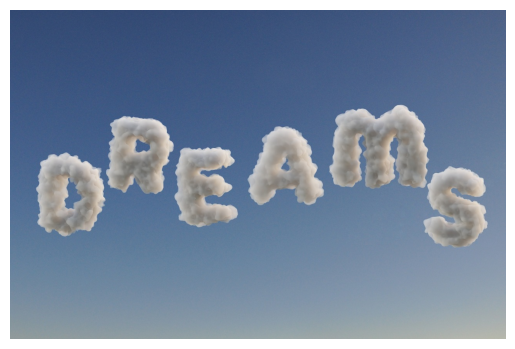

In [3]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# URL da imagem
url = "https://cdn.pixabay.com/photo/2020/02/07/14/22/dream-4827288_1280.jpg"

# Fazer a requisição HTTP para obter a imagem
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Exibir a imagem
plt.imshow(img)
plt.axis('off')
plt.show()

# Salvar a imagem no ambiente
img.save("dreams.png")


In [4]:
extractedInformation = pytesseract.image_to_string(Image.open("dreams.png"))
print(extractedInformation)

B) Carregue a imagem presente na url: "https://cdn.pixabay.com/photo/2017/09/07/10/07/english-2724442_1280.jpg". Aplique o pytesseract. Plote a imagem carregada e o resultado obtido via pytesseract.

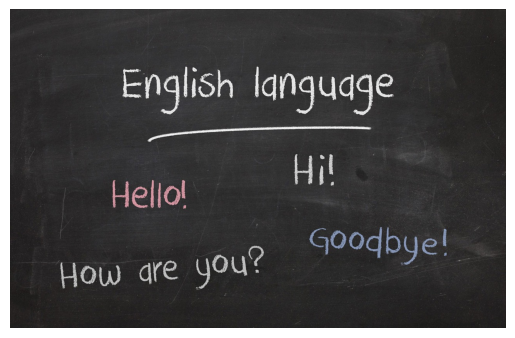

In [5]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# URL da imagem
url = "https://cdn.pixabay.com/photo/2017/09/07/10/07/english-2724442_1280.jpg"

# Fazer a requisição HTTP para obter a imagem
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Exibir a imagem
plt.imshow(img)
plt.axis('off')
plt.show()

# Salvar a imagem no ambiente
img.save("laguange.png")

In [6]:
extractedInformation = pytesseract.image_to_string(Image.open("laguange.png"))
print(extractedInformation)

Silesia Fee eS
piss
Hello! ul

Ss as you? sc ieleFale\e) a



C) Responda: em qual item foi possível reconhecer os caracteres?

**Apenas da segunda imagem foi possível detectar alguns caracteres, enquanto a primeira não conseguiu captar nada.**




---

---




# **Tópico II: Redes Neurais**

Observe o código abaixo e siga as instruções:

In [7]:
# Importações
import tensorflow as tf
import os

# Carregando o dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
# Dimensões dos dados de treinamento
x_train.shape # 60000 amostras, neste caso, é considerado um dataset abrangente.

(60000, 28, 28)

Caso seguíssemos a lógica de vetorização, nossa **Camada X** deveria seguir a seguinte regra: 28x28 = 784, pois nossa imagem possui dimensões 28x28. Mas esta camada já faz parte da porção interior da rede neural (esta informação é importante). Logo, podemos expandir o número de neurônios ou reduzir o número. Observe a arquitetura inicial e seu desempenho, através do código abaixo:

- **Arquitetura Inicial:**

In [9]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(), # 28x28 = 784
 tf.keras.layers.Dense(784, activation=tf.nn.relu), # Camada X -> 784 (28x28)
 tf.keras.layers.Dropout(0.4),
 tf.keras.layers.Dense(300, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.3),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
model.fit(x_train, y_train, epochs=14)

Epoch 1/14
1875/1875 [==============================] - 18s 4ms/step - loss: 0.2497 - accuracy: 0.9230
Epoch 2/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1352 - accuracy: 0.9594
Epoch 3/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1058 - accuracy: 0.9678
Epoch 4/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0938 - accuracy: 0.9715
Epoch 5/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0832 - accuracy: 0.9743
Epoch 6/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0724 - accuracy: 0.9777
Epoch 7/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0692 - accuracy: 0.9792
Epoch 8/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0655 - accuracy: 0.9793
Epoch 9/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0615 - accuracy: 0.9813
Epoch 10/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.05

Agora vamos avaliar o desempenho da arquitetura inicial através da acurácia:

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9818


[0.07367201894521713, 0.9818000197410583]

Obtivemos aproximadamente **98,27%**  para a acurácia junto aos dados de teste.

Agora, observe que, no código abaixo, trocamos o número de neurônios da **Camada X**  para 400 neurônios. Nomeamos esta estrutura de arquitetura modificada.

- **Arquitetura modificada:**

In [11]:
import tensorflow as tf
import os

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(), # 28x28 = 784
 tf.keras.layers.Dense(400, activation=tf.nn.relu), # Camada X -> Observe
 tf.keras.layers.Dropout(0.4),
 tf.keras.layers.Dense(300, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.3),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
model.fit(x_train, y_train, epochs=14)

Epoch 1/14
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2807 - accuracy: 0.9136
Epoch 2/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1465 - accuracy: 0.9548
Epoch 3/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1202 - accuracy: 0.9638
Epoch 4/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1026 - accuracy: 0.9683
Epoch 5/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0936 - accuracy: 0.9716
Epoch 6/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0843 - accuracy: 0.9737
Epoch 7/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0752 - accuracy: 0.9769
Epoch 8/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0716 - accuracy: 0.9773
Epoch 9/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0700 - accuracy: 0.9783
Epoch 10/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.063

Ao avaliar a arquitetura modificada junto aos dados de teste, temos o seguinte resultado:

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9818


[0.06920773535966873, 0.9818000197410583]

Na arquitetura modificada, obtivemos aproximadamente **98,31%**  para a acurácia junto aos dados de teste.

## **Responda:**

#### 1 - Há diferença entre os otimizadores escolhidos para cada uma das arquiteturas?

**Não há diferença entre os otimizadores escolhidos para as duas arquitetura, visto que ambas utilizam o otimizador 'adam'.**

#### 2 - Há diferença entre o número de épocas escolhido para cada uma das arquiteturas?

**Não, o número de épocas escolhido para ambas as arquiteturas é o mesmo, que é 14 épocas.**

#### 3 - Qual é a diferença entre as duas arquiteturas?

**A principal diferença entre as duas arquiteturas está no número de neurônios na Camada X (a primeira camada totalmente conectada após a camada de achatamento). Na arquitetura inicial, a Camada X possui 784 neurônios, enquanto na arquitetura modificada, a Camada X possui 400 neurônios.**

#### 4 - Na avaliação estabelecida junto aos dados de teste, qual arquitetura obteve um desempenho melhor?

**A arquitetura modificada obteve um desempenho ligeiramente melhor. A acurácia da arquitetura inicial foi de aproximadamente 98,27%, enquanto a arquitetura modificada alcançou uma acurácia de aproximadamente 98,31%. Portanto, a arquitetura modificada teve um desempenho ligeiramente superior.**

#### 5 - Neste caso é vantajoso manter os 784 neurônios na Camada X?

**Com base nos resultados apresentados, a redução do número de neurônios na Camada X para 400 neurônios na arquitetura modificada não resultou em uma perda significativa de desempenho. No entanto, a diferença na acurácia entre as duas arquiteturas é pequena. Portanto, pode-se argumentar que, do ponto de vista do desempenho, é vantajoso reduzir o número de neurônios na Camada X para economizar recursos computacionais, desde que a qualidade do modelo seja mantida.**

## **Obs:** Devemos levar em consideração o otimizador, o numero de camadas, o número de épocas e outros fatores, além do número de neurônios, que podem fugir de nosso controle, por exemplo, a qualidade das amostras oriundas da base de dados disponível.



---


---



# **Tópico III: Redes Neurais - Implementação**

Em sala de aula obtivemos uma acurácia de aproximadamente **33,77%**  ao utilizar a empregar o conjunto de dados CIFAR-10 e a arquitetura presente no código abaixo:

In [13]:
# Importações
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Carregar o conjunto de dados CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalizar os valores dos pixels para estar entre 0 e 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Criar o modelo MLP
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)), # 32x32x3 = 3072
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumo do modelo
model.summary()

# Treinar o modelo
model.fit(x_train, y_train, epochs=10)

# Avaliar o modelo com o conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Acurácia no conjunto de teste:", test_acc)

170498071/170498071 [==============================] - 2s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               393344    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                     



---




## **Produza melhorias estruturais de forma que seu código supere o desempenho do código discutido em aula - Para este tópico utilize a aceleração de hardware via GPU:**



---



## **1-No ambiente de execução do Google Colab, vá em Editar e clique em Configurações do Notebook.**

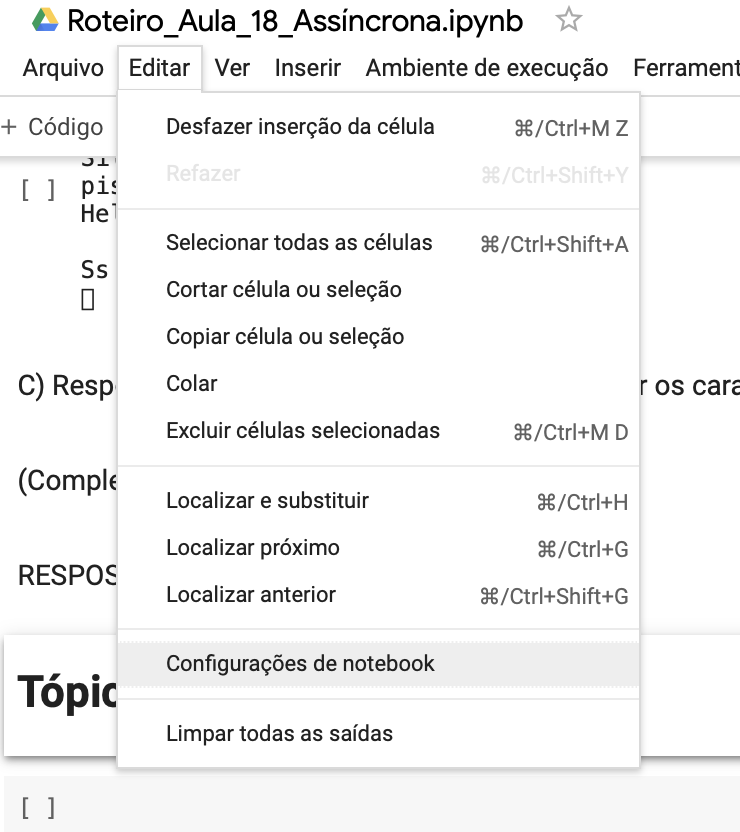

## **2-Dentro das configurações do notebook escolha a opção GPU. Ao escolher esta opção, você conseguirá acelerar o treinamento de sua arquitetura.**

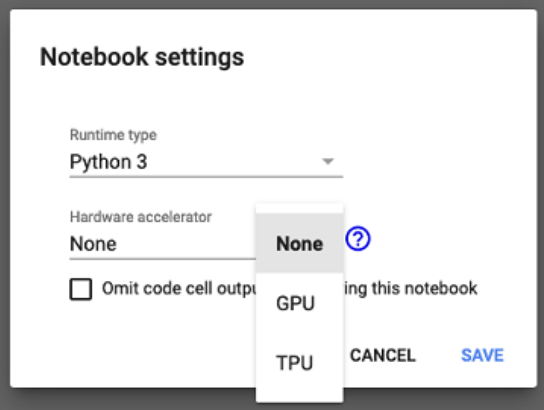

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Carregar o conjunto de dados CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalizar os valores dos pixels para estar entre 0 e 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Criar o modelo CNN mais complexo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar o modelo com taxa de aprendizado ajustada
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()

# Aumentar o número de épocas e tamanho do batch
model.fit(x_train, y_train, epochs=30, batch_size=64)

# Avaliar o modelo com o conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Acurácia no conjunto de teste:", test_acc)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             